# 0.0 IMPORTS


In [1]:
import pandas as pd
import inflection
import math
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image

## 0.1 HELPER FUNCTIONS

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display(HTML('<style>.container{width:100% !important; }</style>]'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 1000
    pd.set_option('display.expand_frame_repr', False)
    sns.set()


jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 LOAD DATA

In [3]:
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_store_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0 DATA DESCRIPT

In [4]:
df1 = df_raw.copy()
df1.isna().sum()
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.1 RENAME COLUMNS



In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
            'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


def snakecase(x): return inflection.underscore(x)


cols_new = list(map(snakecase, cols_old))
df1.columns = cols_new

## 1.2 DATA DIMENSIONS


In [7]:
print(f'Number of rows {df1.shape[0]}')
print(f'Number of colunms {df1.shape[1]}')

Number of rows 1017209
Number of colunms 18


## 1.3 DATA TYPES


In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4CHECK NA


In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FILLOUT NA



In [10]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x)
                                                                else x)
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else
                                                x['competition_open_since_month'], axis=1)
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else
                                               x['competition_open_since_year'], axis=1)
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else
                                     x['promo2_since_week'], axis=1)
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else
                                     x['promo2_since_year'], axis=1)

df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['promo_interval'].fillna(0, inplace=True)
df1['is_promo'] = df1[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else
                                                             1 if x['month_map'] in x['promo_interval'].split(',') else
                                                             0, axis=1)

## 1.6 CHANGE TYPES

In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(
    int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(
    int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 DESCRIPTIVE STATISTICAL

In [12]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(
    exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 NUMERICAL ATTRIBUTES

In [13]:
# CENTRAL:  TENDENCY - MEAN - MEDIAN
# DISPERSION: STD, MIN, MAX, RANGE, SKEW, KURTOSIS
num_attributes.agg(["min", "max", "mean", "median",
                   "std", "skew", "kurtosis"]).T

,min,max,mean,median,std,skew,kurtosis
store,1.0,1115.0,558.429727,558.0,321.908651,-0.000955,-1.200524
day_of_week,1.0,7.0,3.998341,4.0,1.997391,0.001593,-1.246873
sales,0.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
customers,0.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
open,0.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
promo,0.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
school_holiday,0.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
competition_distance,20.0,200000.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
competition_open_since_month,1.0,12.0,6.786849,7.0,3.311087,-0.042076,-1.232607
competition_open_since_year,1900.0,2015.0,2010.324840,2012.0,5.515593,-7.235657,124.071304


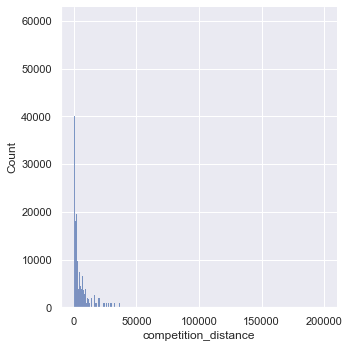

In [14]:
sns.displot(df1['competition_distance'])

### 1.7.2 CATEGORICAL ATTRIBUTES

In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

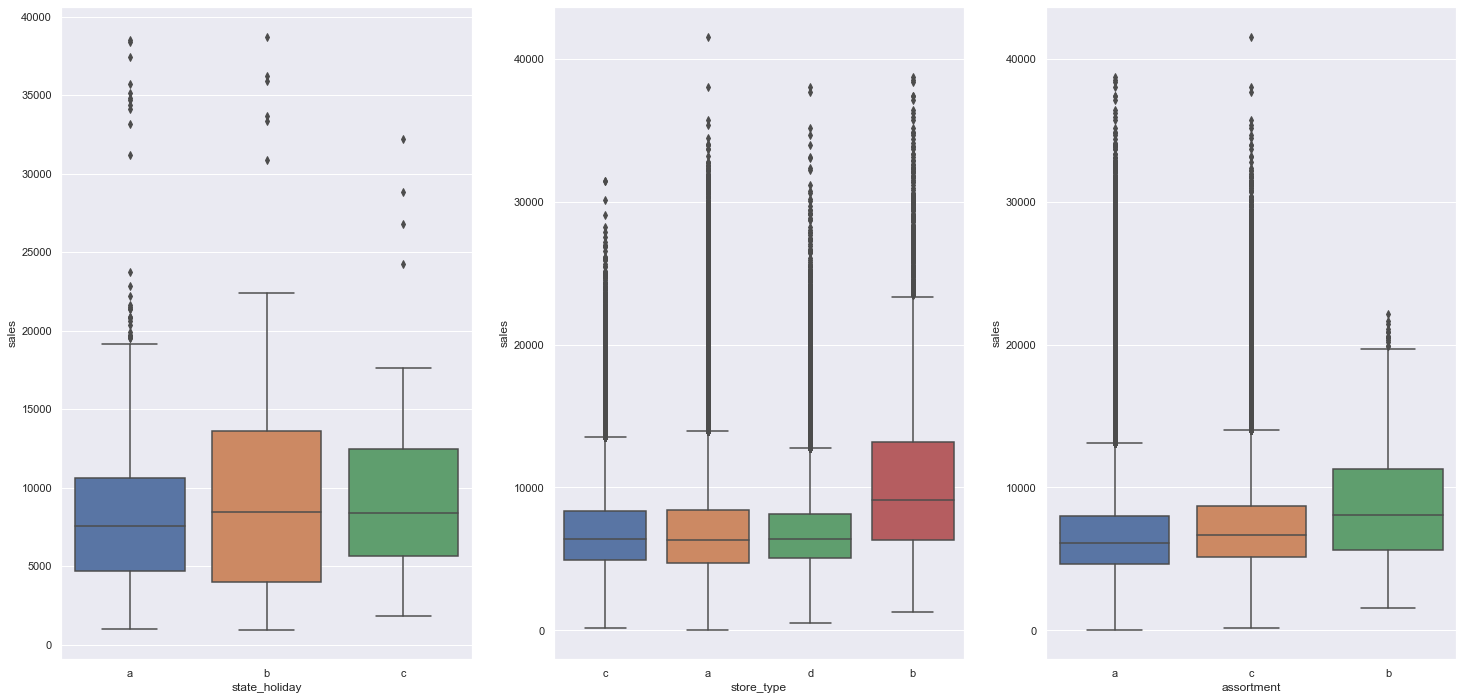

In [16]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] != 0)]
aux2 = df1[df1['sales'] != 0]
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux2)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux2)

# 2.0 FEATURE ENGINEERING

In [17]:
df2 = df1.copy()

## 2.1 HYPOTHESIS MIND MAP


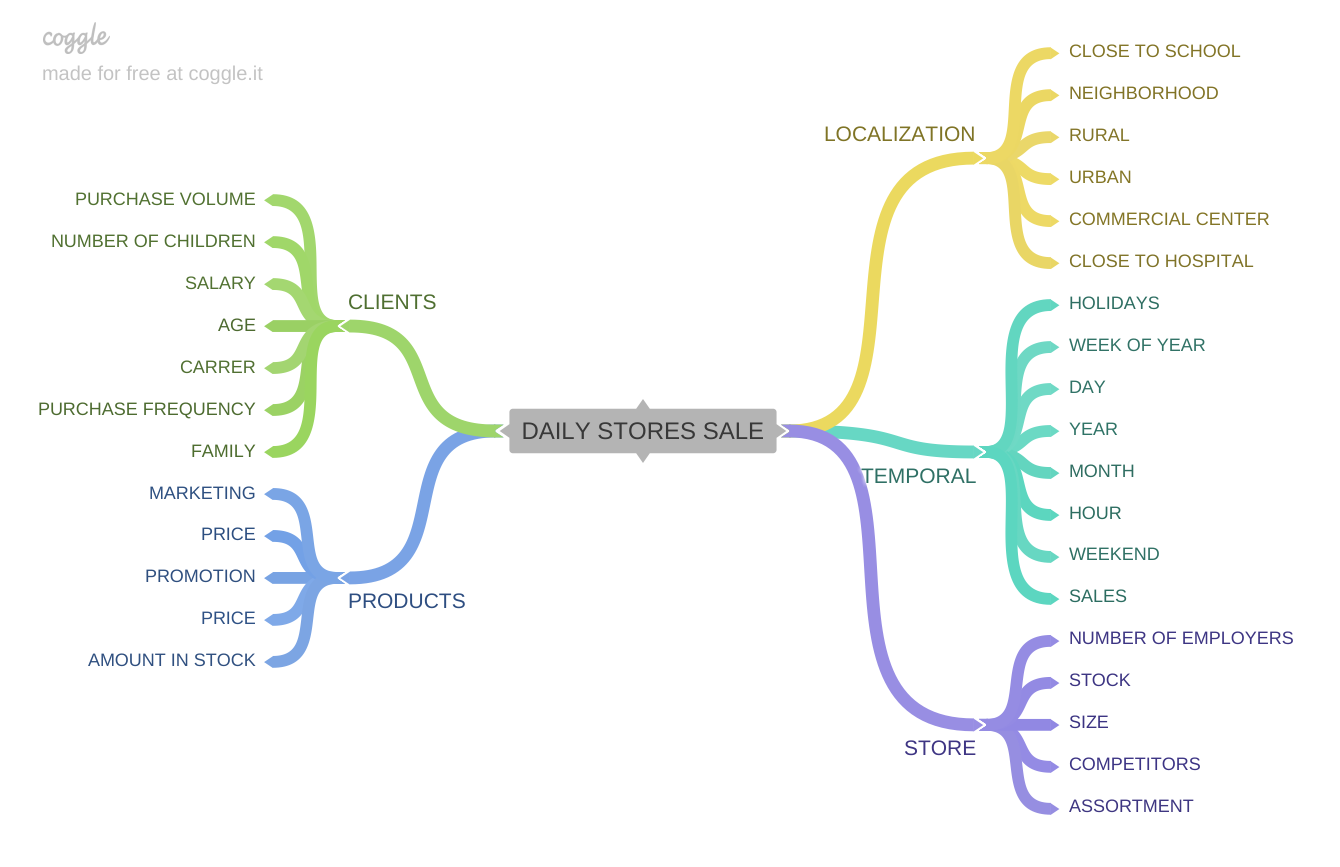

In [18]:
Image('img/DAILY_STORES_SALE.png')

## 2.2 CREATION OF HYPOTHESES

### 2.2.1 STORE HYPOTHESES

**1** Stores with more employees sell more  
**2** Stores with the most inventory sell the most  
**3** Largest stores sell more  
**4** Smaller stores sell less  
**5** Stores with the Largest Assortment Sell More  

### 2.2.2 PRODUCT HYPOTHESES

**1** Stores that invest more in marketing sell more  
**2** Stores that display more products in their windows sell more  
**3** Stores with lower prices sell more  
**4** Stores with lower prices on products for longer sell more  

### 2.2.3 TEMPORAL HYPOTHESES

**1** Stores that have holidays sell less  
**2** Stores that open in the first 6 months should sell more  
**3** Stores that open on weekends should sell more  

### 2.2.4 FINAL LIST HYPOTHESES 

**1** Stores with the Largest Assortment Sell More    
**2** Stores with close competitors should sell less    
**3** Stores with longer competitors should sell more    
**4** Stores with promotions active for longer should sell more  
**5** Stores with more days of promotions should sell more    
**6** Stores with more consecutive promotions should sell more  
**7** Stores open during the Christmas holiday should sell more  
**8** Stores should sell more over the years      
**9** Stores should sell more after the 10th of each month  
**10** Stores should sell more in the second half
**11** Stores should sell less on weekends  
**12** Stores should sell less during school holidays  
 

## 2.3 FEATURE ENGINEERING

In [19]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
# year of week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')
# competition since
df2['competition_since'] = df2.apply(lambda x : datetime.datetime(year = x['competition_open_since_year'] , month = x['competition_open_since_month'], day=1), axis = 1)
df2['competition_since_month'] = (df2['date']-df2['competition_since']).apply(lambda x : int((x.days)/30))
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply( lambda x : datetime.datetime.strptime(x + '-1','%Y-%W-%w')) - datetime.timedelta(days = 7)
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] ) /7 ).apply(lambda x : x.days).astype( int )
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x : 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended') 
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x : 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christimas' if x == 'c' else 'regular_day')

